In [45]:
import os
import uuid
import cv2 as cv
import time
import tensorflow as tf
import json
import wget
import numpy as np
import shutil
import glob
from matplotlib import pyplot as plt

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [7]:
imagePath= os.path.join('images')
classes= {'One', 'Two', 'Three', 'Four', 'Five'}
classDic= {'One':1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five':5}

In [4]:
classValues = list(classDic.values())
classKeys = list(classDic.keys())

In [97]:
for cla in classes:
    dirpath = os.path.join(imagePath, cla)
    if not os.path.exists(dirpath):
        !mkdir {dirpath}

In [6]:
# Capture images to generate dataset
imToCap= 10
for cla in classes:
    print('class: ', cla)
    for i in range(imToCap):
        cap=cv.VideoCapture(0)
        _, frame= cap.read()
        imName= os.path.join(imagePath, '{}.jpg'.format(str(uuid.uuid1())))
        cv.imwrite(imName, frame)
        print('image #', i)
        time.sleep(2)
        cv.imshow('Capture data', frame)
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
cap.release()
cv.destroyAllWindows()

class:  Two
image # 0
image # 1
image # 2
image # 3
image # 4
image # 5
image # 6
image # 7
image # 8
image # 9
class:  One
image # 0
image # 1
image # 2
image # 3
image # 4
image # 5
image # 6
image # 7
image # 8
image # 9


In [111]:
# lable images using labelImg

!pip install --upgrade pyqt5 lxml

     ---------------------------------------- 0.0/6.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.8 MB 660.6 kB/s eta 0:00:11
     ---------------------------------------- 0.0/6.8 MB 653.6 kB/s eta 0:00:11
      --------------------------------------- 0.1/6.8 MB 1.1 MB/s eta 0:00:07
     - -------------------------------------- 0.2/6.8 MB 1.3 MB/s eta 0:00:06
     - -------------------------------------- 0.3/6.8 MB 1.5 MB/s eta 0:00:05
     -- ------------------------------------- 0.4/6.8 MB 1.5 MB/s eta 0:00:05
     -- ------------------------------------- 0.4/6.8 MB 1.5 MB/s eta 0:00:05
     --- ------------------------------------ 0.5/6.8 MB 1.5 MB/s eta 0:00:05
     --- ------------------------------------ 0.6/6.8 MB 1.4 MB/s eta 0:00:05
     ---- ----------------------------------- 0.7/6.8 MB 1.6 MB/s eta 0:00:04
     ---- ----------------------------------- 0.8/6.8 MB 1.6 MB/s eta 0:00:04
     ---- ----------------------------------- 0.8/6.8 MB 1.6 MB/s e


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
LABELIMG_PATH = os.path.join('labelImg')

In [116]:
if not os.path.exists(LABELIMG_PATH):
    !mkdir {LABELIMG_PATH}
    !git clone https://github.com/tzutalin/labelImg {LABELIMG_PATH}

Cloning into 'labelImg'...


In [117]:
if os.name == 'posix':
    !make qt5py3
if os.name =='nt':
    !cd {LABELIMG_PATH} && pyrcc5 -o libs/resources.py resources.qrc

In [77]:
!cd {LABELIMG_PATH} && python labelImg.py

Image:D:\Projects\HandNumberRecognizer\images\RAW\Newfolder\1af1a47f-edf0-11ed-add9-d8f3bc62f698.jpg -> Annotation:D:/Projects/HandNumberRecognizer/images/RAW/Newfolder\1af1a47f-edf0-11ed-add9-d8f3bc62f698.xml
Image:D:\Projects\HandNumberRecognizer\images\RAW\Newfolder\1cdfd834-edf0-11ed-b8be-d8f3bc62f698.jpg -> Annotation:D:/Projects/HandNumberRecognizer/images/RAW/Newfolder\1cdfd834-edf0-11ed-b8be-d8f3bc62f698.xml
Image:D:\Projects\HandNumberRecognizer\images\RAW\Newfolder\1ed02cb1-edf0-11ed-8c8e-d8f3bc62f698.jpg -> Annotation:D:/Projects/HandNumberRecognizer/images/RAW/Newfolder\1ed02cb1-edf0-11ed-8c8e-d8f3bc62f698.xml
Image:D:\Projects\HandNumberRecognizer\images\RAW\Newfolder\2a5102b5-edf0-11ed-b821-d8f3bc62f698.jpg -> Annotation:D:/Projects/HandNumberRecognizer/images/RAW/Newfolder\2a5102b5-edf0-11ed-b821-d8f3bc62f698.xml
Image:D:\Projects\HandNumberRecognizer\images\RAW\Newfolder\2c4374dc-edf0-11ed-a5ab-d8f3bc62f698.jpg -> Annotation:D:/Projects/HandNumberRecognizer/images/RAW/N

qt.qpa.fonts: Unable to open default EUDC font: "EUDC.TTE"


## Download the pretrained model

In [4]:
if not os.path.exists(os.path.join(CUSTOM_MODEL_NAME)):
    !mkdir {CUSTOM_MODEL_NAME}

wget.download(PRETRAINED_MODEL_URL)
!move {PRETRAINED_MODEL_NAME+'.tar.gz'} {os.path.join(CUSTOM_MODEL_NAME)}
!cd {os.path.join(CUSTOM_MODEL_NAME)} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


## Create the label map && TF records

In [8]:
labels = [{'name':'One', 'id':1}, 
          {'name':'Two', 'id':2}, 
          {'name':'Three', 'id':3}, 
          {'name':'Four', 'id':4}, 
          {'name':'Five', 'id':5}]

labelmap_path =os.path.join(CUSTOM_MODEL_NAME, PRETRAINED_MODEL_NAME, LABEL_MAP_NAME)

with open(labelmap_path, 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [9]:
script_path =os.path.join(CUSTOM_MODEL_NAME, PRETRAINED_MODEL_NAME, 'TFscript')
if not os.path.exists(script_path):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {script_path}

In [10]:
!python {os.path.join(script_path, TF_RECORD_SCRIPT_NAME)} -x images\RAW\Newfolder\train -l {labelmap_path} -o {os.path.join(CUSTOM_MODEL_NAME, PRETRAINED_MODEL_NAME, 'train.record')} 
!python {os.path.join(script_path, TF_RECORD_SCRIPT_NAME)} -x images\RAW\Newfolder\val -l {labelmap_path} -o {os.path.join(CUSTOM_MODEL_NAME, PRETRAINED_MODEL_NAME, 'val.record')} 


Successfully created the TFRecord file: my_ssd_mobnet\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\train.record
Successfully created the TFRecord file: my_ssd_mobnet\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\val.record


## Update config

In [11]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [12]:
config = config_util.get_configs_from_pipeline_file(os.path.join(CUSTOM_MODEL_NAME, PRETRAINED_MODEL_NAME,"pipeline.config"))

In [13]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(os.path.join(CUSTOM_MODEL_NAME, PRETRAINED_MODEL_NAME,"pipeline.config"), "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [14]:
pipeline_config.model.ssd.num_classes = 5
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(CUSTOM_MODEL_NAME, PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= labelmap_path
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(CUSTOM_MODEL_NAME, PRETRAINED_MODEL_NAME, 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = labelmap_path
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(CUSTOM_MODEL_NAME, PRETRAINED_MODEL_NAME, 'val.record')]

In [15]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(os.path.join(CUSTOM_MODEL_NAME, PRETRAINED_MODEL_NAME,"pipeline.config"), "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)  

## Downlaod TensorFlow Object Detection API to train the model

In [16]:
if not os.path.exists(os.path.join('tesnorflow')):
    !git clone https://github.com/tensorflow/models {os.path.join('tesnorflow')}

## Train the Model

In [17]:
VERIFICATION_SCRIPT = os.path.join('tesnorflow', 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.10.10: D:\Projects\TFODCourse\tfod\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
D:\Projects\TFODCourse\tfod\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\builders\model_builder.py:1112: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Building experimental DeepMAC meta-arch.'
W0509 13:50:16.576275 29656 model_builder.py:1112] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.35s
I0509 13:50:16.733797 29656 test_util.py:2460] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.35s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=

In [18]:
TRAINING_SCRIPT = os.path.join('tesnorflow', 'research', 'object_detection', 'model_main_tf2.py')

In [19]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=15000".format(TRAINING_SCRIPT, os.path.join('model'),os.path.join("model", "pipeline.config"))


In [20]:
print(command)

python tesnorflow\research\object_detection\model_main_tf2.py --model_dir=model --pipeline_config_path=model\pipeline.config --num_train_steps=15000


In [21]:
#To give GPU more memory as needed

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

# 8. Load Train Model From Checkpoint

In [46]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util
import cv2

In [47]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(os.path.join('model', 'pipeline.config'))
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join('model', 'ckpt-16')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections


category_index = label_map_util.create_category_index_from_labelmap(os.path.join('model', 'label_map.pbtxt'))

### Model testing

In [25]:
testImg = os.path.join('images', 'RAW', 'Newfolder', 'val', 'c8552245-b50e-11ed-806e-d8f3bc62f698.jpg')

In [35]:
img = cv2.imread(testImg)
input_tensor= cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)
input_tensor= tf.convert_to_tensor(input_tensor, dtype=tf.uint8)
input_tensor= tf.convert_to_tensor(np.expand_dims(input_tensor, 0), dtype=tf.float32)
image_np = np.array(img)

detections = detect_fn(input_tensor)

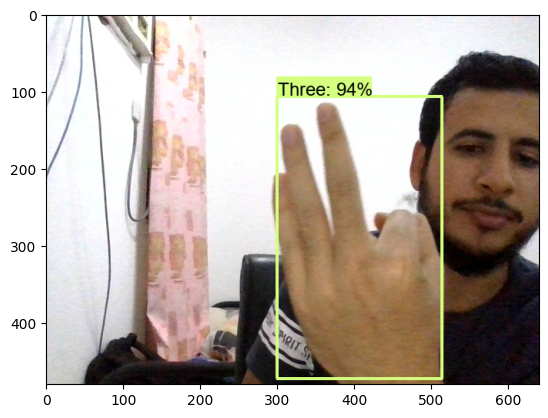

In [28]:
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.40,
            agnostic_mode=False)
%matplotlib inline
plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [99]:
# Different way for visuallization



# bbox = detections['detection_boxes'][0].numpy()
# classIndexes = detections['detection_classes'][0].numpy().astype(np.int32)
# classScores = detections['detection_scores'][0].numpy()

# threshold =0.5

# imH, imW, imC = img.shape

# bboxIdx = tf.image.non_max_suppression(bbox, classScores, max_output_size=50, iou_threshold=threshold, score_threshold=threshold)

# if len(bboxIdx) !=0:
#     for i in bboxIdx:
#         bbox = tuple(bbox[i].tolist())
#         classConfidence = round(100*classScores[i])
#         classIndex = classIndexes[i]
        
#         classLabelText = classKeys[classValues.index(classIndex+1)]
#         print(classIndex)
#         displayText = '{}: {}%'.format(classLabelText, classConfidence)
        
#         ymin, xmin, ymax, xmax =bbox
        
#         xmin, xmax, ymin, ymax = (xmin * imW, xmax*imW, ymin * imH, ymax * imH)
#         xmin, xmax, ymin, ymax = int(xmin), int(xmax), int(ymin), int(ymax)
        
        
#         cv2.rectangle(img, (xmin, ymin), (xmax, ymax), color=(255,255,0), thickness=1)
#         cv2.putText(img, displayText, (xmin, ymin - 10), cv2.FONT_HERSHEY_PLAIN, 1, (255,200,122), 2)
#         cv2.imshow("result", img)


# cv2.waitKey(0)
# cv2.destroyAllWindows()

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

In [63]:
# Live evaluation

cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))


fourcc = cv2.VideoWriter_fourcc(* 'XVID') # this code is to help you set the resolution, pixels, colors, etc for the output video. There are other different codes (like XVID) you can search about them if u interested
out = cv2.VideoWriter('output_video.mp4', fourcc, 20.0, (width, height))

while cap.isOpened(): 
    ret, frame = cap.read()
    if ret:
        input_tensor= cv2.cvtColor(frame.copy(), cv2.COLOR_BGR2RGB)
        input_tensor= tf.convert_to_tensor(input_tensor, dtype=tf.uint8)
        input_tensor= tf.convert_to_tensor(np.expand_dims(input_tensor, 0), dtype=tf.float32)
        image_np = np.array(frame)
        detections = detect_fn(input_tensor)

        num_detections = int(detections.pop('num_detections'))
        detections = {key: value[0, :num_detections].numpy()
                      for key, value in detections.items()}
        detections['num_detections'] = num_detections

        # detection_classes should be ints.
        detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

        label_id_offset = 1
        image_np_with_detections = image_np.copy()

        viz_utils.visualize_boxes_and_labels_on_image_array(
                    image_np_with_detections,
                    detections['detection_boxes'],
                    detections['detection_classes']+label_id_offset,
                    detections['detection_scores'],
                    category_index,
                    use_normalized_coordinates=True,
                    max_boxes_to_draw=1,
                    min_score_thresh=.7,
                    agnostic_mode=False)
        
        out.write(image_np_with_detections)
        cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))

        if cv2.waitKey(10) & 0xFF == ord('q'):
            cap.release()
            out.release()
            cv2.destroyAllWindows()
            break